In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Simple Linear Model

In [3]:
pwd

'C:\\Users\\akumar5\\Documents\\Python Bootcamp\\2021 Python for Machine Learning & Data Science Masterclass'

In [5]:
df = pd.read_csv('C:\\Users\\akumar5\\Documents\\Python Bootcamp\\2021 Python for Machine Learning & Data Science Masterclass\\DATA\\rock_density_xray.csv')

In [7]:
df.isnull().sum()

Rebound Signal Strength nHz    0
Rock Density kg/m3             0
dtype: int64

In [8]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [9]:
df.columns = ['Signal', 'Density']

<AxesSubplot:xlabel='Signal', ylabel='Density'>

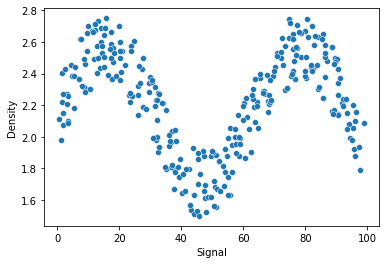

In [11]:
sns.scatterplot(x='Signal', y='Density', data=df)

In [18]:
X = df['Signal'].values.reshape(-1, 1)
y = df['Density']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr_model = LinearRegression()

In [23]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [24]:
lr_preds = lr_model.predict(X_test)

In [25]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [30]:
np.sqrt(mean_squared_error(y_test, lr_preds))

0.25700519965846297

In [37]:
signal_range = np.arange(0,100)

In [39]:
signal_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [40]:
signal_preds = lr_model.predict(signal_range.reshape(-1,1))

In [41]:
signal_preds

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

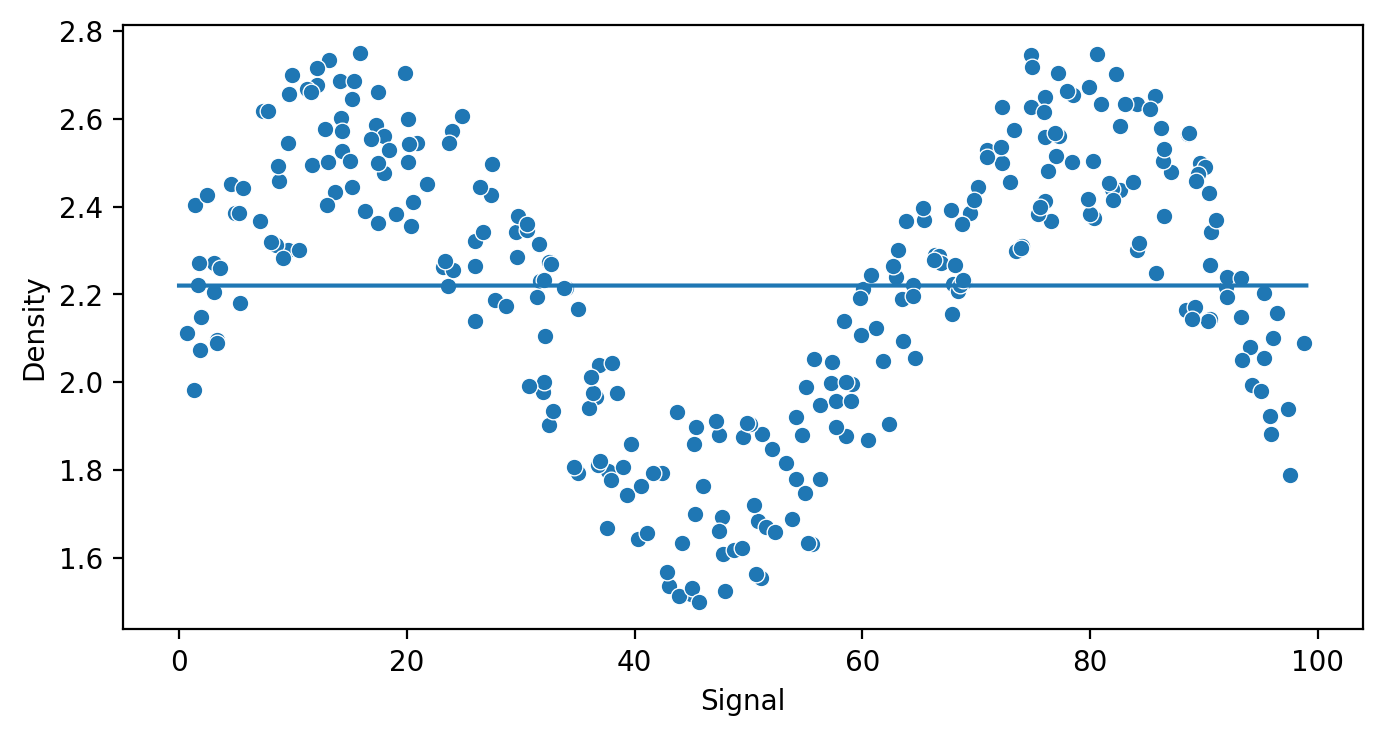

In [43]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(x='Signal', y='Density', data=df)

plt.plot(signal_range, signal_preds)

In [60]:
# Generic function to run multiple models

In [58]:
def run_model(model, X_train, y_train, X_test, y_test):
    
    # FIT MODEL TRAINING
    model.fit(X_train, y_train)
     
    # GET METRICS
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
      
    # PLOT RESULTS MODEL OF SIGNAL RANGE
    
    plt.figure(figsize=(8,4), dpi=200)
    sns.scatterplot(data=df, x='Signal', y='Density')
    
    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))
    plt.plot(signal_range, signal_preds, color='red')
    

MAE: 0.211198973318633
RMSE: 0.25700519965846297


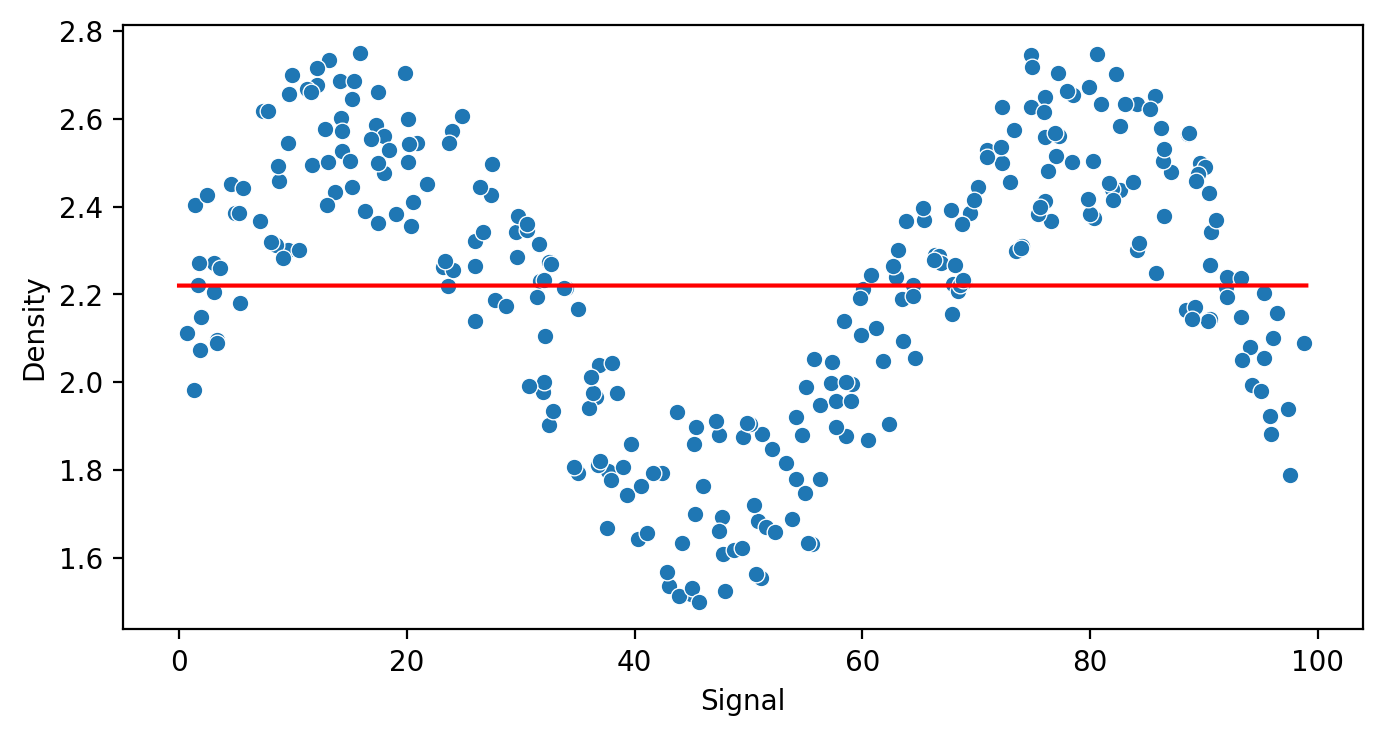

In [59]:
model = LinearRegression()

run_model(model, X_train, y_train, X_test, y_test)

In [61]:
# Polynomial Regression 

In [62]:
from sklearn.pipeline import make_pipeline

In [63]:
from sklearn.preprocessing import PolynomialFeatures

In [72]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())

MAE: 0.12484333844142978
RMSE: 0.1405853826482287


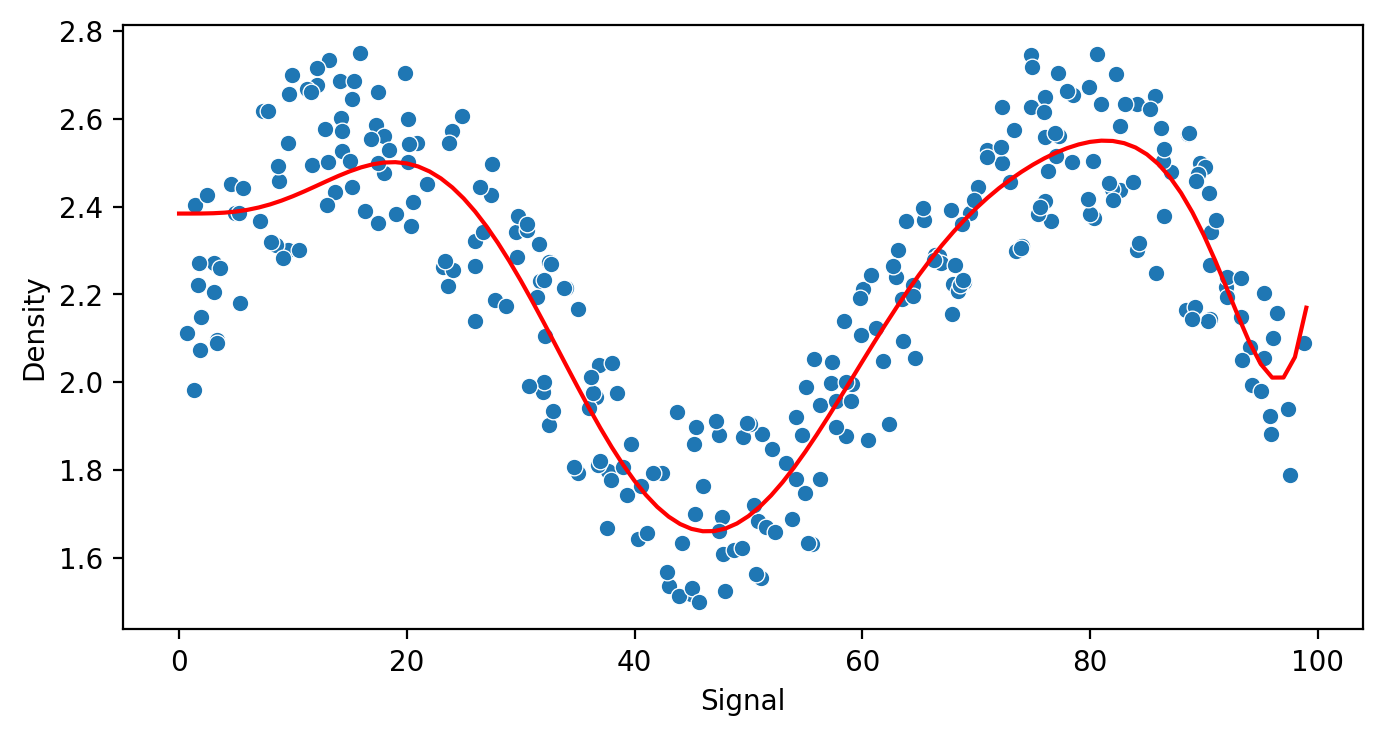

In [71]:
run_model(pipe, X_train, y_train, X_test, y_test)

In [78]:
# K Nearest Neighbors Regression

In [73]:
from sklearn.neighbors import KNeighborsRegressor

MAE: 0.11877297474442382
RMSE: 0.15234870286353372
MAE: 0.12198383614100564
RMSE: 0.13730685016923655
MAE: 0.11635971693292672
RMSE: 0.13277855732740926
MAE: 0.13363165935705315
RMSE: 0.15954234753677107


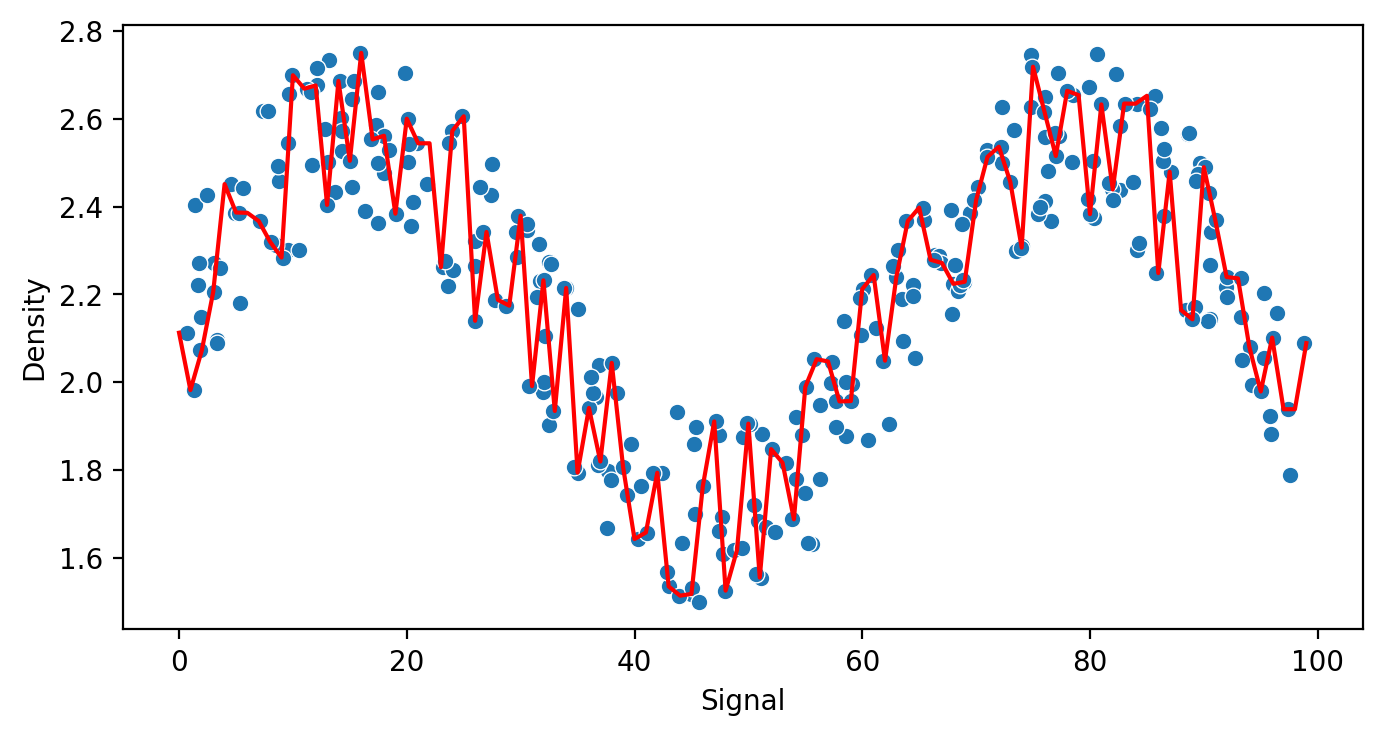

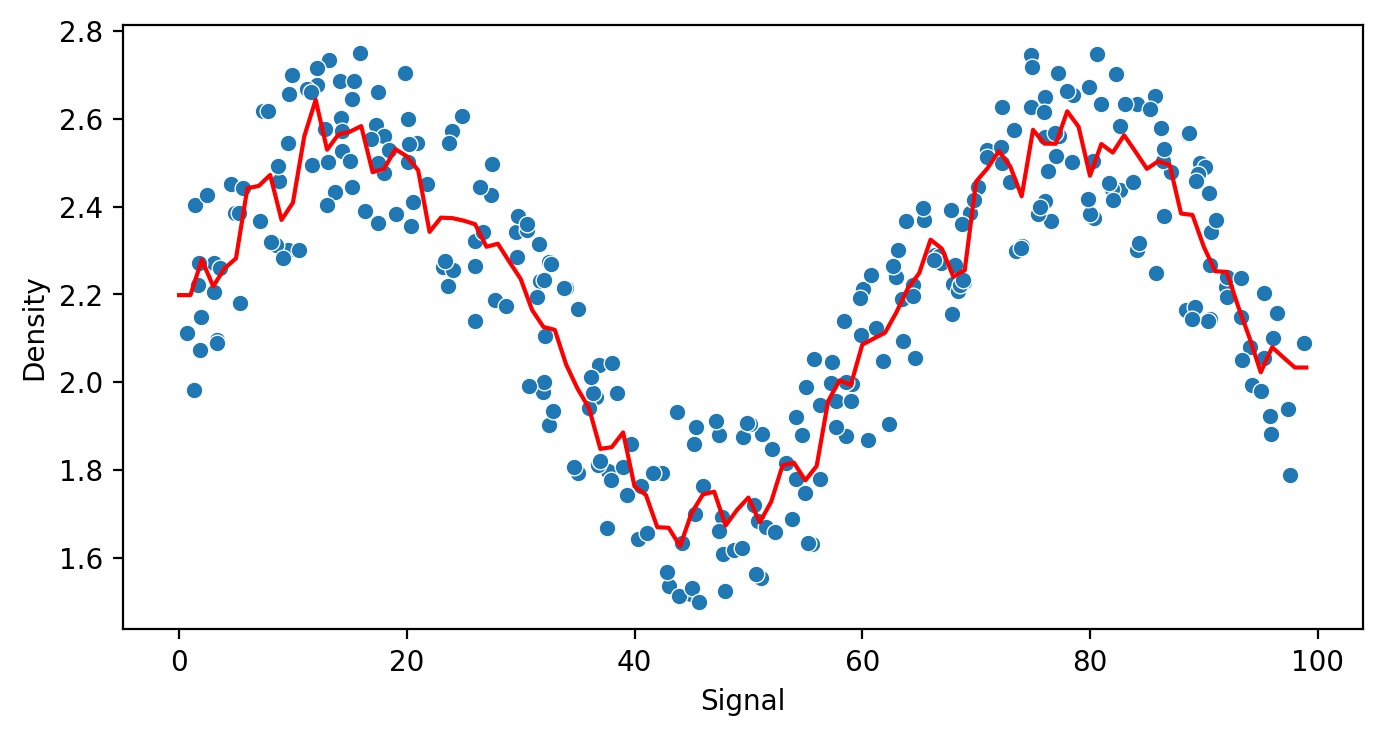

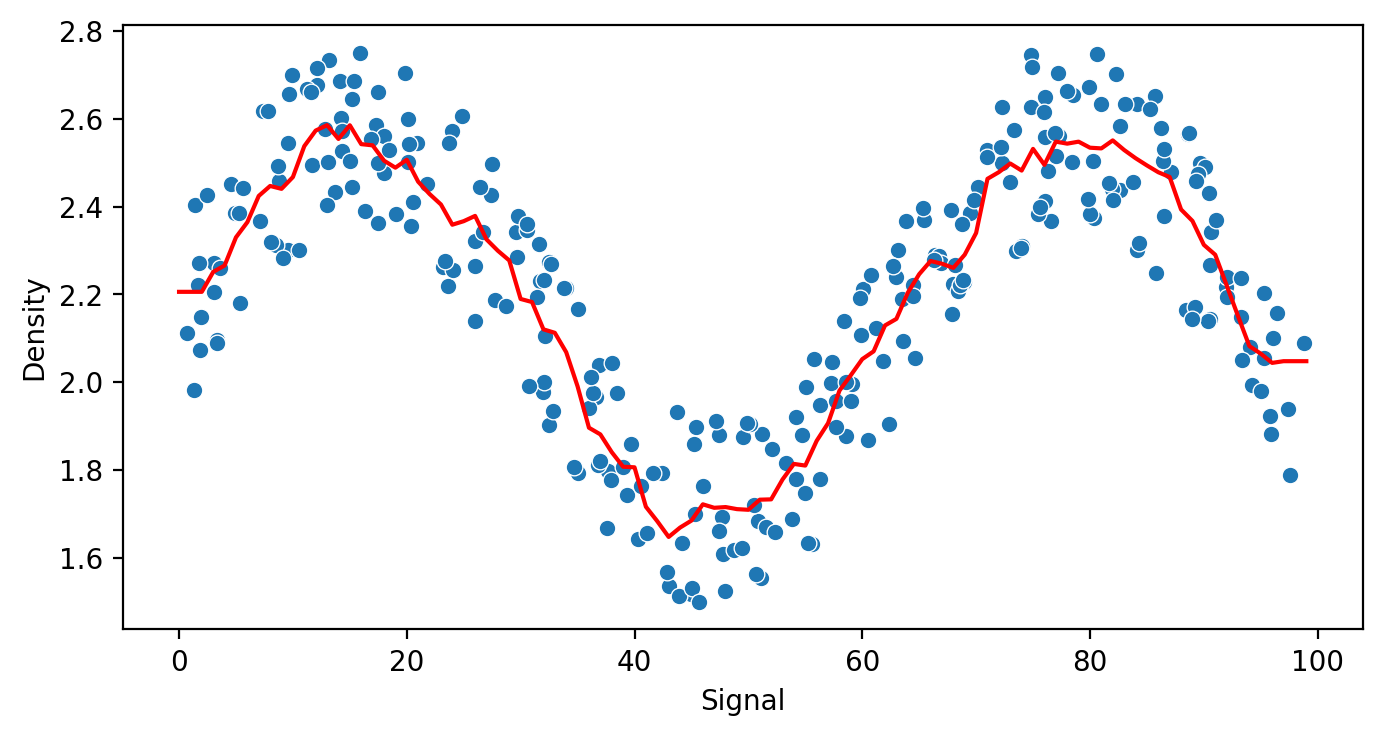

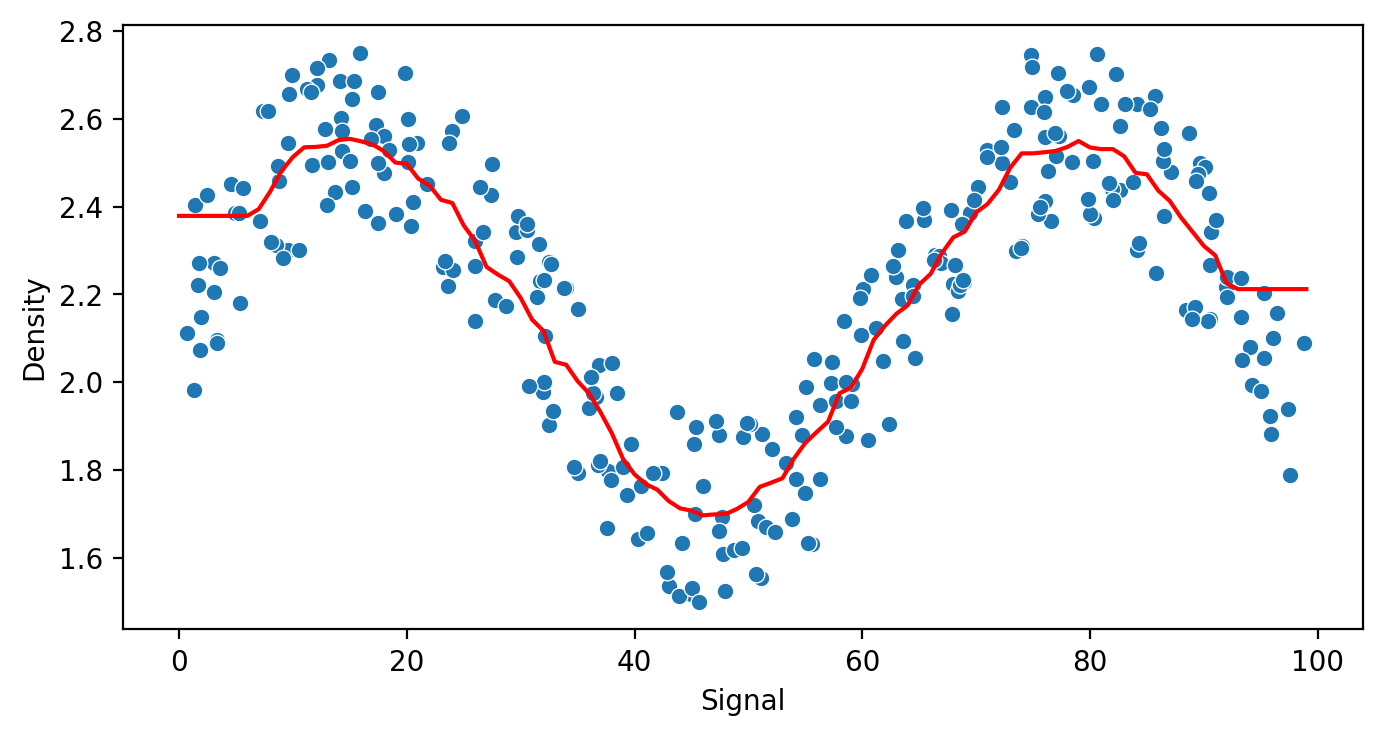

In [75]:
k_values = [1,5,10,30]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train, y_train, X_test, y_test)

In [79]:
# Decision Tree Regression

In [76]:
from sklearn.tree import DecisionTreeRegressor

MAE: 0.11877297474442382
RMSE: 0.15234870286353372


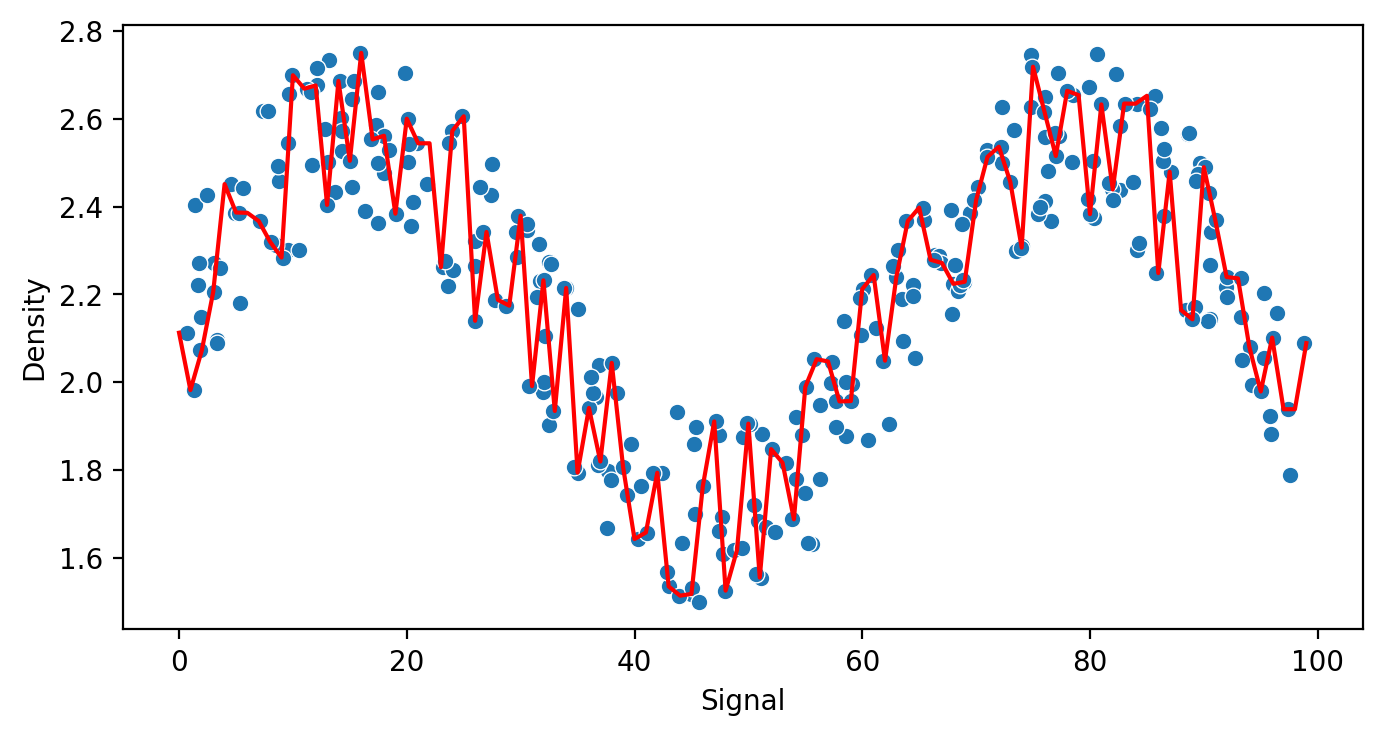

In [77]:
model = DecisionTreeRegressor()

run_model(model, X_train, y_train, X_test, y_test)

In [80]:
# Support Vector Regression

In [81]:
from sklearn.svm import SVR

In [82]:
from sklearn.model_selection import GridSearchCV

In [87]:
svr = SVR()
param_grid = {'C':[0.01,0.1,1,5,10,100,1000], 'gamma':['auto', 'scale']}

grid = GridSearchCV(svr, param_grid=param_grid)

MAE: 0.10839253242165772
RMSE: 0.12634668775105407


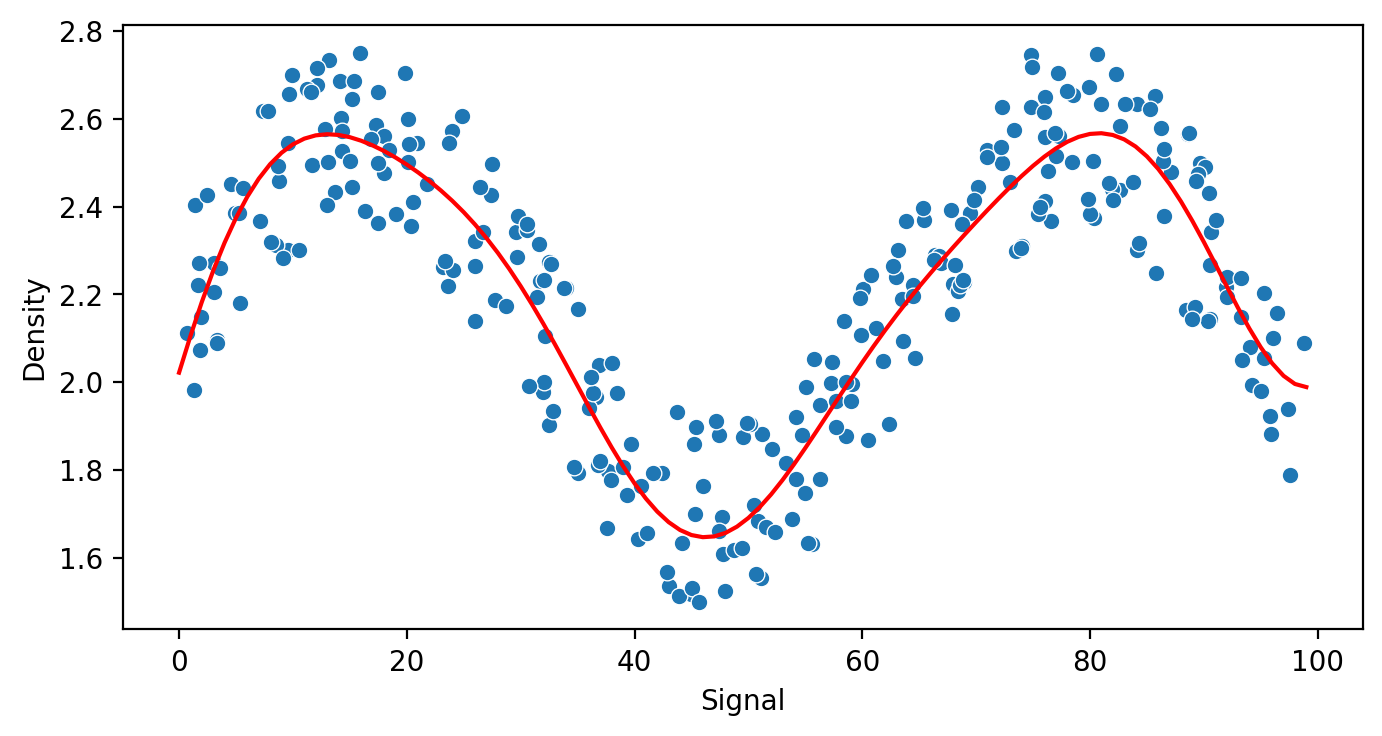

In [88]:
run_model(grid, X_train, y_train, X_test, y_test)

In [ ]:
# Random Forest Regression

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
rfr = RandomForestRegressor(n_estimators=10)

MAE: 0.11006029036993124
RMSE: 0.13255572850384575


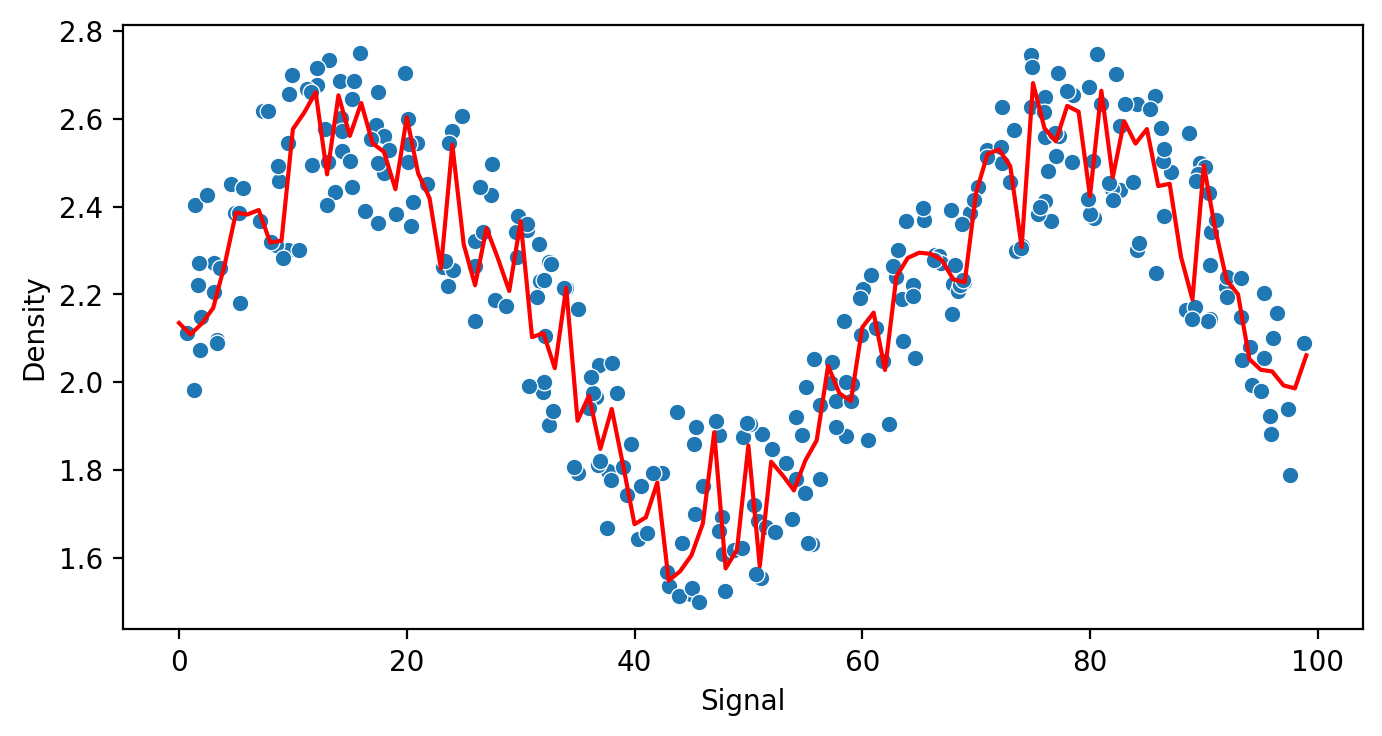

In [91]:
run_model(rfr, X_train, y_train, X_test, y_test)

In [ ]:
# Boosting Regression Models

In [96]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

MAE: 0.11318284854800689
RMSE: 0.13294148649584667


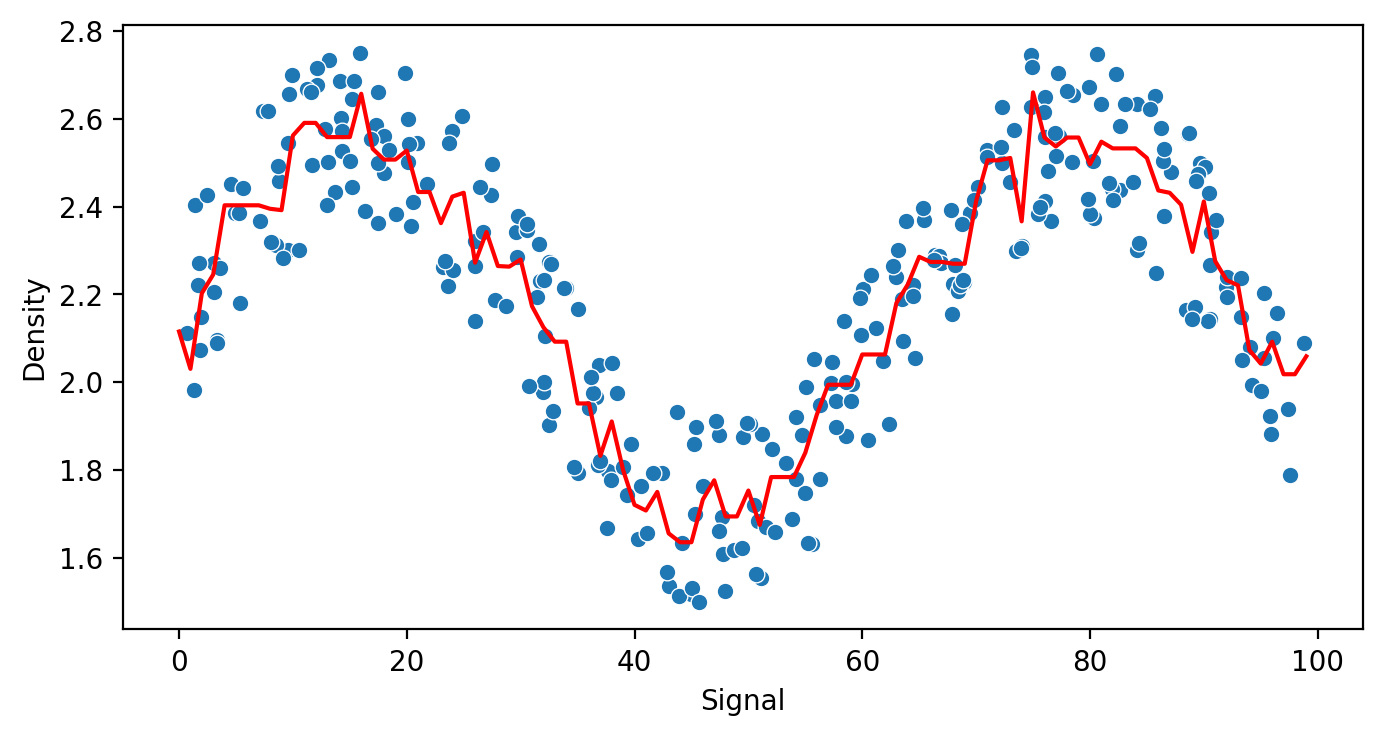

In [97]:
model = GradientBoostingRegressor()
run_model(model, X_train, y_train, X_test, y_test)

MAE: 0.12113250078130441
RMSE: 0.14010990982409352


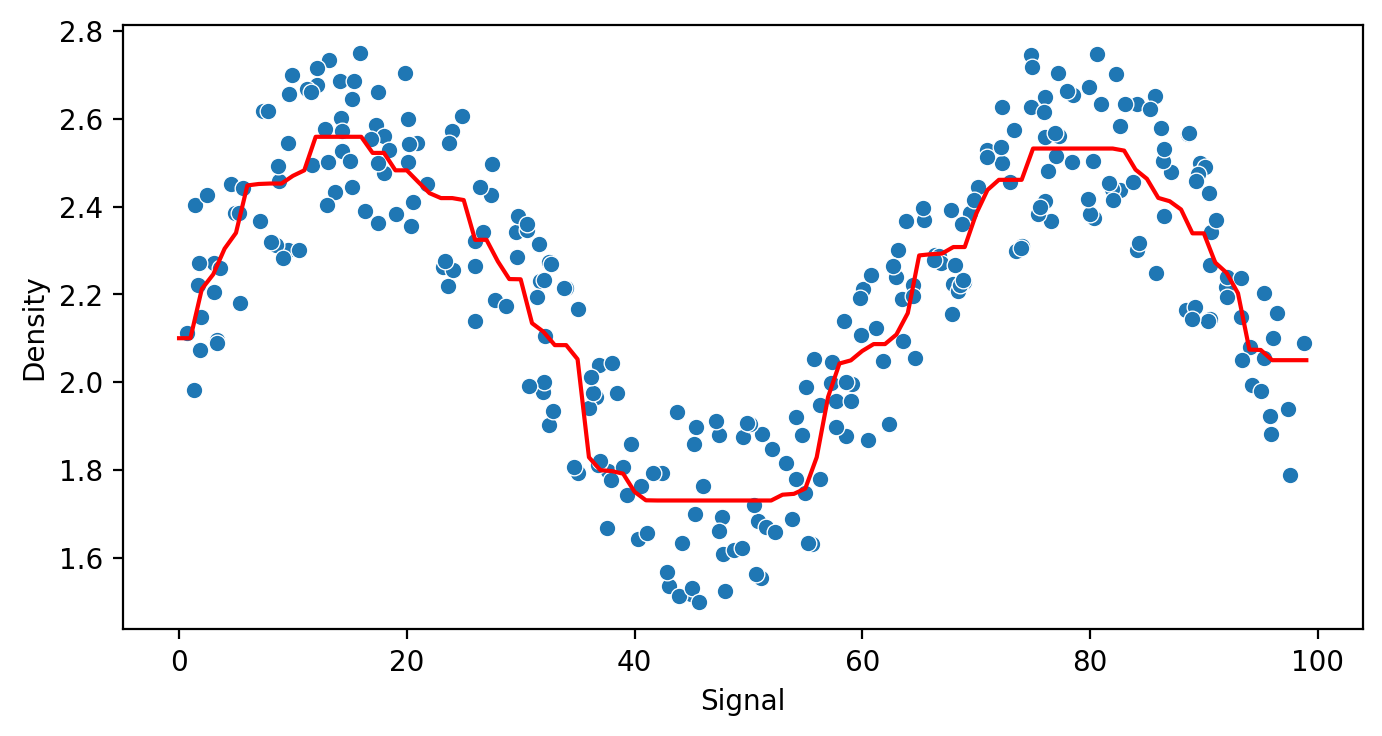

In [98]:
model = AdaBoostRegressor()
run_model(model, X_train, y_train, X_test, y_test)